# British Airways
An airline company founded at 25 August 1919. This mini-project aims to find out the reviews about the airline company. The source of the data is scrapped from a third-party website www.airlinequality.com.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import string
from collections import Counter
from wordcloud import WordCloud
import contractions
import preprocessor as p
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

## Web Scraping (07/01/2023)

In [2]:
# from selenium import webdriver
# from selenium.webdriver.chrome.service import Service
# from webdriver_manager.chrome import ChromeDriverManager
# from bs4 import BeautifulSoup

# ba_web = "https://www.airlinequality.com/airline-reviews/british-airways/?sortby=post_date%3ADesc&pagesize="
# reviews_num = "3401"

# driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
# driver.get(ba_web + reviews_num)

# soup = BeautifulSoup(driver.page_source, "html.parser")
# items = []

# for item in soup.find_all('div', class_='body'):
#         items.append(item.find('h2', class_='text_header').text)
        
#         items.append(item.find('time')['datetime'])
#         item.find(('time')).decompose()
        
#         if "Trip Verified" in (item.find('div', 'text_content').text):
#             items.append("yes")
#         else:
#             items.append("no")
        
#         review = (item.find('div', 'text_content').text)
#         indexed = review.find("|")
#         items.append(review[indexed+1:])
        
#         ctr_ratings = 0
#         ratings = []
#         for scores in item.find_all('table', 'review-ratings'):
#             try:
#                 _ = scores.find('td', 'review-rating-header aircraft').text
#                 items.append(scores.find('td', 'review-value').text)
#                 scores.find('td', 'review-value').decompose()
#             except:
#                 items.append(None)
#             try:
#                 _ =(scores.find('td', 'review-rating-header type_of_traveller').text)
#                 items.append(scores.find('td', 'review-value').text)
#                 scores.find('td', 'review-value').decompose()
#             except:
#                 items.append(None)
#             try:
#                 _ =(scores.find('td', 'review-rating-header cabin_flown').text)
#                 items.append(scores.find('td', 'review-value').text)
#                 scores.find('td', 'review-value').decompose()
#             except:
#                 items.append(None)
#             try:
#                 _ =(scores.find('td', 'review-rating-header route').text)
#                 items.append(scores.find('td', 'review-value').text)
#                 scores.find('td', 'review-value').decompose()
#             except:
#                 items.append(None)
#             try:
#                 _ =(scores.find('td', 'review-rating-header date_flown').text)
#                 items.append(scores.find('td', 'review-value').text)
#                 scores.find('td', 'review-value').decompose()
#             except:
#                 items.append(None)
#             for stars in scores.find_all('td', 'review-rating-stars stars'):
#                     for i in range(len(stars)):
#                         try:
#                             stars.find('span', 'star fill').decompose()
#                         except:
#                             break
#                     if (stars.find('span', 'star')) == None:
#                         ratings.append("5")
#                     else:
#                         ratings.append(int(stars.find('span', 'star').text) - 1)
#             try:
#                 _ =(scores.find('td', 'review-rating-header seat_comfort').text)
#                 items.append(ratings[ctr_ratings])
#                 ctr_ratings += 1
#             except:
#                 items.append(None)
#             try:
#                 _ =(scores.find('td', 'review-rating-header cabin_staff_service').text)
#                 items.append(ratings[ctr_ratings])
#                 ctr_ratings += 1
#             except:
#                 items.append(None)
#             try:
#                 _ =(scores.find('td', 'review-rating-header food_and_beverages').text)
#                 items.append(ratings[ctr_ratings])
#                 ctr_ratings += 1
#             except:
#                 items.append(None)
#             try:
#                 _ =(scores.find('td', 'review-rating-header inflight_entertainment').text)
#                 items.append(ratings[ctr_ratings])
#                 ctr_ratings += 1
#             except:
#                 items.append(None)
#             try:
#                 _ =(scores.find('td', 'review-rating-header ground_service').text)
#                 items.append(ratings[ctr_ratings])
#                 ctr_ratings += 1
#             except:
#                 items.append(None)
#             try:
#                 _ =(scores.find('td', 'review-rating-header wifi_and_connectivity').text)
#                 items.append(ratings[ctr_ratings])
#                 ctr_ratings += 1
#             except:
#                 items.append(None)
#             try:
#                 _ =(scores.find('td', 'review-rating-header value_for_money').text)
#                 items.append(ratings[ctr_ratings])
#                 ctr_ratings += 1
#             except:
#                 items.append(None)
#             try:
#                 items.append(scores.find('td', 'review-value rating-yes').text)
#             except:
#                 items.append(scores.find('td', 'review-value rating-no').text)
                
# driver.close()

# df = []
# ctr = 0
# temp_arr = []
# for item in items:
#     if ctr < 17:
#         temp_arr.append(item)
#         ctr += 1
#     else:
#         df.append(temp_arr)
#         temp_arr = []
#         temp_arr.append(item)
#         ctr = 1
        
# df = pd.DataFrame(df, columns=["title", "review_date", "verified", "review", "aircraft", "traveller", "class", "route",
#                               "flight_date", "seat_comfort", "cabin_staff", "food_beverages", "inflight_entertainment", 
#                               "ground_service", "wifi_connectivity", "value_for_money", "recommended"])

# try:
#     df.to_csv('british_airways_3400.csv', index=False)
#     print("saved into csv!")
# except:
#     print("file already exists!")
#     pass

## Preprocessing

In [3]:
df = pd.read_csv('british_airways_3400.csv')
date = "7th January 2023"

In [4]:
df.head()

,title,review_date,verified,review,aircraft,traveller,class,route,flight_date,seat_comfort,cabin_staff,food_beverages,inflight_entertainment,ground_service,wifi_connectivity,value_for_money,recommended
0,"""Luggage is delayed""",2023-01-06,no,"The staff are friendly. The plane was cold, w...",NaN,Family Leisure,Economy Class,Istanbul to Vancouver via Heathrow,January 2023,1.0,5.0,1.0,1.0,1.0,NaN,1,no
1,"""the worst business class experience I've ever...",2023-01-02,yes,Probably the worst business class experience ...,"A320, A380",Family Leisure,Business Class,Vienna to Los Angeles via London Heathrow,January 2023,1.0,2.0,1.0,1.0,1.0,1.0,1,no
2,"""not recommended for business class""",2023-01-02,yes,"Definitely not recommended, especially for bu...",NaN,Business,Business Class,London to San francisco,January 2023,2.0,5.0,2.0,1.0,2.0,1.0,1,no
3,"""surprisingly a good product""",2023-01-02,yes,BA shuttle service across the UK is still su...,A321,Business,Economy Class,London to Belfast,January 2023,4.0,5.0,3.0,NaN,5.0,NaN,4,yes
4,"""Maybe the old charm will return soon""",2023-01-01,yes,I must admit like many others I tend to avoid...,A380,Business,Economy Class,Doha to London,December 2022,5.0,3.0,1.0,1.0,5.0,NaN,4,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   3400 non-null   object 
 1   review_date             3400 non-null   object 
 2   verified                3400 non-null   object 
 3   review                  3400 non-null   object 
 4   aircraft                1805 non-null   object 
 5   traveller               2682 non-null   object 
 6   class                   3398 non-null   object 
 7   route                   2678 non-null   object 
 8   flight_date             2674 non-null   object 
 9   seat_comfort            3302 non-null   float64
 10  cabin_staff             3294 non-null   float64
 11  food_beverages          3067 non-null   float64
 12  inflight_entertainment  2378 non-null   float64
 13  ground_service          2615 non-null   float64
 14  wifi_connectivity       511 non-null    

In [6]:
df[['seat_comfort', 'cabin_staff', 'food_beverages', 'inflight_entertainment', 'ground_service', 'wifi_connectivity']] = df[['seat_comfort', 'cabin_staff', 'food_beverages', 'inflight_entertainment', 'ground_service', 'wifi_connectivity']].replace(np.nan, 0)

In [7]:
df.isna().sum()

title                        0
review_date                  0
verified                     0
review                       0
aircraft                  1595
traveller                  718
class                        2
route                      722
flight_date                726
seat_comfort                 0
cabin_staff                  0
food_beverages               0
inflight_entertainment       0
ground_service               0
wifi_connectivity            0
value_for_money              0
recommended                  0
dtype: int64

## Data Visualization

In [8]:
def highest_value(x, height):
    colors = []
    if(len(height) == 5):
        max_index = height.index(max(height)) + 1
        for i in range(5):
            if(max_index - 1 == i):
                colors.append("royalblue")
            else:
                colors.append("gold")
    else:
        max_index = height.index(max(height[1:]))
        colors.append("gray")
        for i in range(1, 6):
            if(max_index == i):
                colors.append("royalblue")
            else:
                colors.append("gold")
                
    return colors

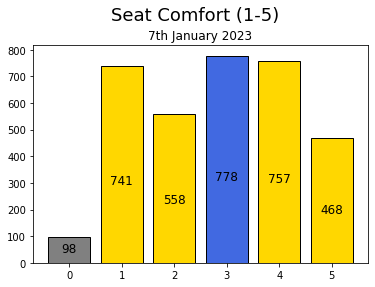

In [9]:
x, height = [sorted(list(df['seat_comfort'].unique().astype(int))), 
             list(df['seat_comfort'].value_counts().sort_index())]

colors = highest_value(x, height)

plt.bar(x, height, color=colors, edgecolor="black")
plt.suptitle("Seat Comfort (1-5)", y=1.015, fontsize=18)
plt.title(date)
for i in range(0, len(x)):
        plt.text(i,(height[i])//2.5,height[i], ha = 'center', size=12)

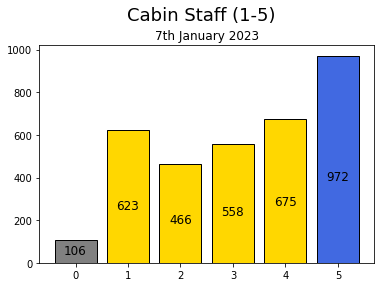

In [10]:
x, height = [sorted(list(df['cabin_staff'].unique().astype(int))), 
             list(df['cabin_staff'].value_counts().sort_index())]

colors = highest_value(x, height)

plt.bar(x, height, color=colors, edgecolor="black")
plt.suptitle("Cabin Staff (1-5)", y=1.015, fontsize=18)
plt.title(date)
for i in range(0, len(x)):
        plt.text(i,(height[i])//2.5,height[i], ha = 'center', size=12)

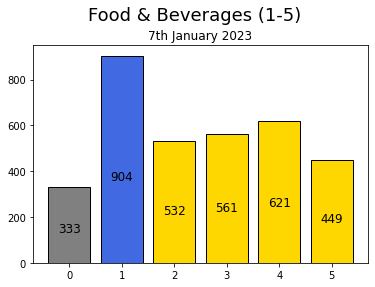

In [11]:
x, height = [sorted(list(df['food_beverages'].unique().astype(int))), 
             list(df['food_beverages'].value_counts().sort_index())]

colors = highest_value(x, height)

plt.bar(x, height, color=colors, edgecolor="black")
plt.suptitle("Food & Beverages (1-5)", y=1.015, fontsize=18)
plt.title(date)
for i in range(0, len(x)):
        plt.text(i,(height[i])//2.5,height[i], ha = 'center', size=12)

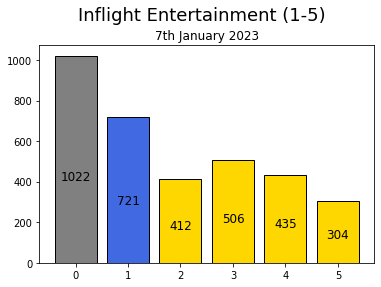

In [12]:
x, height = [sorted(list(df['inflight_entertainment'].unique().astype(int))), 
             list(df['inflight_entertainment'].value_counts().sort_index())]

colors = highest_value(x, height)

plt.bar(x, height, color=colors, edgecolor="black")
plt.suptitle("Inflight Entertainment (1-5)", y=1.015, fontsize=18)
plt.title(date)
for i in range(0, len(x)):
        plt.text(i,(height[i])//2.5,height[i], ha = 'center', size=12)

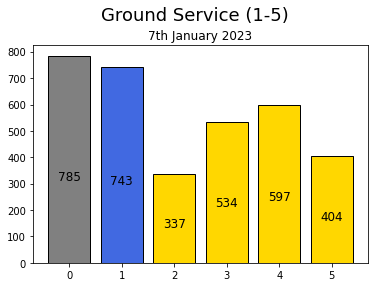

In [13]:
x, height = [sorted(list(df['ground_service'].unique().astype(int))), 
             list(df['ground_service'].value_counts().sort_index())]

colors = highest_value(x, height)

plt.bar(x, height, color=colors, edgecolor="black")
plt.suptitle("Ground Service (1-5)", y=1.015, fontsize=18)
plt.title(date)
for i in range(0, len(x)):
        plt.text(i,(height[i])//2.5,height[i], ha = 'center', size=12)

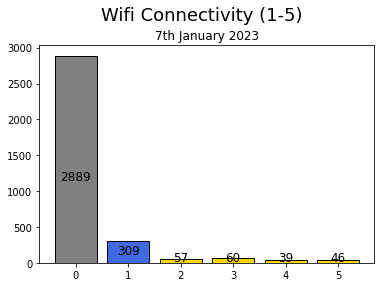

In [14]:
x, height = [sorted(list(df['wifi_connectivity'].unique().astype(int))), 
             list(df['wifi_connectivity'].value_counts().sort_index())]

colors = highest_value(x, height)

plt.bar(x, height, color=colors, edgecolor="black")
plt.suptitle("Wifi Connectivity (1-5)", y=1.015, fontsize=18)
plt.title(date)
for i in range(0, len(x)):
        plt.text(i,(height[i])//2.5,height[i], ha = 'center', size=12)

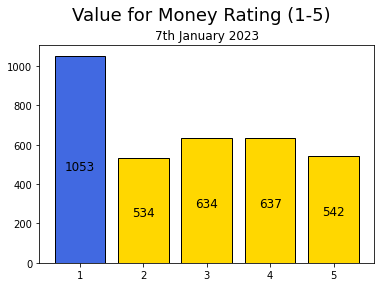

In [15]:
x, height = [sorted(list(df['value_for_money'].unique().astype(int))), 
             list(df['value_for_money'].value_counts().sort_index())]

colors = highest_value(x, height)

plt.bar(x, height, color=colors, edgecolor="black")
plt.suptitle("Value for Money Rating (1-5)", y = 1.015, fontsize=18)
plt.title(date)

for i in range(len(x)):
        plt.text(i+1, (height[i])//2.25,height[i], ha = 'center', size=12)

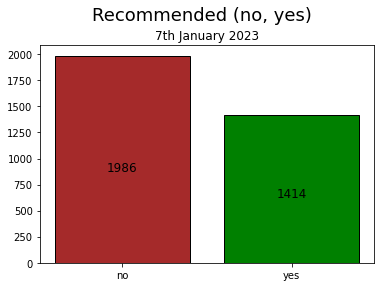

In [16]:
x = df['recommended'].unique()
height = df['recommended'].value_counts()

plt.bar(x, height, color=['brown', 'green'], edgecolor="black")
plt.suptitle("Recommended (no, yes)", y = 1.015, fontsize=18)
plt.title(date)
for i in range(len(x)):
        plt.text(i,(height[i])//2.25,height[i], ha = 'center', size=12)

In [17]:
df.describe()

,seat_comfort,cabin_staff,food_beverages,inflight_entertainment,ground_service,wifi_connectivity,value_for_money
count,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000,3400.000000
mean,2.811471,3.173235,2.464706,1.859706,2.184412,0.290882,2.729706
std,1.426038,1.569510,1.589514,1.691409,1.742919,0.868412,1.465761
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,3.000000,3.000000,2.000000,1.000000,2.000000,0.000000,3.000000
75%,4.000000,5.000000,4.000000,3.000000,4.000000,0.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [18]:
df.corr(method='pearson').style.background_gradient(cmap='Blues', axis=0)

,seat_comfort,cabin_staff,food_beverages,inflight_entertainment,ground_service,wifi_connectivity,value_for_money
seat_comfort,1.000000,0.635951,0.617931,0.406672,0.296541,0.077556,0.705694
cabin_staff,0.635951,1.000000,0.702419,0.358477,0.302792,0.079579,0.663241
food_beverages,0.617931,0.702419,1.000000,0.486817,0.239857,0.104737,0.698189
inflight_entertainment,0.406672,0.358477,0.486817,1.000000,0.058079,0.177413,0.401465
ground_service,0.296541,0.302792,0.239857,0.058079,1.000000,0.177587,0.312143
wifi_connectivity,0.077556,0.079579,0.104737,0.177413,0.177587,1.000000,0.034744
value_for_money,0.705694,0.663241,0.698189,0.401465,0.312143,0.034744,1.000000


In [19]:
wordnet_lemmatizer = WordNetLemmatizer()
stop_words = nltk.corpus.stopwords.words('english')

In [20]:
reviews = df['review'].values.tolist()

#Create a new list to store the cleaned tweets
clean_reviews = []
for i in range(len(reviews)):
    #Undercase all letters
    temp = p.clean(reviews[i]).casefold()
    #Remove all punctuations
    temp = temp.translate(str.maketrans('', '', string.punctuation))
    #Create new list to store filtered tokenized words
    filtered = []
    #Create new variable for tokenized sentence
    words_temp = word_tokenize(temp)
    #Create new variable to store string that has its contractions removed
    str_temp_fixed = ""
    #Clean the words from contractions
    for j in words_temp:
        j = contractions.fix(j)
        str_temp_fixed += " " + j
    #Create new variable for the cleaned tokenized sentence
    words_temp_fixed = word_tokenize(str_temp_fixed)
    for c in words_temp_fixed:
        #Check if a word is a stop word
        if c not in stop_words:
            #Lemmatize the word, then stores it into the "filtered" list
            c = wordnet_lemmatizer.lemmatize(c)
            filtered.append(c)
    #Create a new variable to store the filtered words that are re-combined back into a sentence
    cleaned = " ".join(filtered)
    #Insert the "cleaned" variable to "clean_tweet" list
    clean_reviews.append(cleaned)
    
#Create a new dataframe filled with the cleaned tweets
clean_reviews = pd.DataFrame(clean_reviews, columns=["review"])
clean_reviews['recommended'] = df['recommended']
clean_reviews.head()

,review,recommended
0,staff friendly plane cold shivering gave light...,no
1,probably worst business class experience ever ...,no
2,definitely recommended especially business cla...,no
3,ba shuttle service across uk still surprisingl...,yes
4,must admit like many others tend avoid ba long...,no


In [21]:
manual_stop = ['flight', 'ba', 'british', 'airway']

#Create a new list to store the cleaned tweets
manual_clean_reviews = []
for i in range(len(clean_reviews)):
    temp = clean_reviews.iloc[i,0]
    #Create new list to store filtered tokenized words
    filtered = []
    #Create new variable for tokenized sentence
    words_temp = word_tokenize(temp)
    for c in words_temp:
        #Check if a word is a stop word
        if c not in manual_stop:
            #Stores it into the "filtered" list
            filtered.append(c)
    #Create a new variable to store the filtered words that are re-combined back into a sentence
    cleaned = " ".join(filtered)
    #Insert the "cleaned" variable to "manual_clean_tweet" list
    manual_clean_reviews.append(cleaned)
    
#Create a new dataframe filled with the cleaned tweets
clean_reviews["review"] = manual_clean_reviews
clean_reviews.head()

,review,recommended
0,staff friendly plane cold shivering gave light...,no
1,probably worst business class experience ever ...,no
2,definitely recommended especially business cla...,no
3,shuttle service across uk still surprisingly g...,yes
4,must admit like many others tend avoid long ha...,no


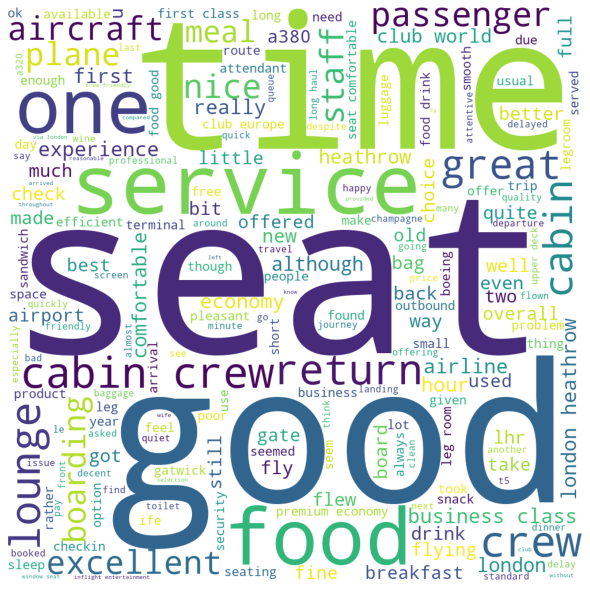

In [22]:
WC_pos = WordCloud(width = 1000, height = 1000,
                background_color ='white',
                min_font_size = 10).generate(' '.join(map(str, (clean_reviews.loc[clean_reviews['recommended'] == 'yes', 'review']))))

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(WC_pos)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

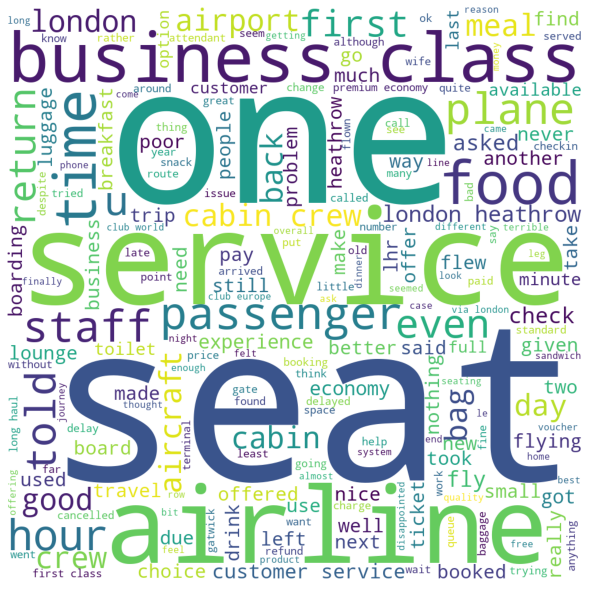

In [23]:
WC_pos = WordCloud(width = 1000, height = 1000,
                background_color ='white',
                min_font_size = 10).generate(' '.join(map(str, (clean_reviews.loc[clean_reviews['recommended'] == 'no', 'review']))))

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(WC_pos)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

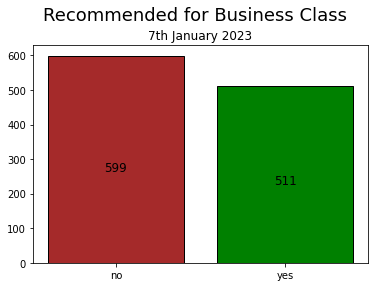

In [24]:
x = (df.loc[df['class'] == 'Business Class', 'recommended']).unique()
height = (df.loc[df['class'] == 'Business Class', 'recommended']).value_counts()

plt.bar(x, height, color=['brown', 'green'], edgecolor="black")
plt.suptitle("Recommended for Business Class", y = 1.015, fontsize=18)
plt.title(date)
for i in range(len(x)):
        plt.text(i,(height[i])//2.25,height[i], ha = 'center', size=12)